In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np

encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input=input_img, output=decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [2]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Autoencoderなので、入力画像がラベルとしても使われる
##入力の形状を(60000, 28, 28)⇒784次元の入力になるように (60000, 784) に変形する。

In [20]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [22]:
np.prod(x_test.shape[1:])

784

In [4]:
autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.3605 - val_loss: 0.2716
Epoch 2/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2646 - val_loss: 0.2540
Epoch 3/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.2434 - val_loss: 0.2312
Epoch 4/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.2234 - val_loss: 0.2140
Epoch 5/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.2084 - val_loss: 0.2009
Epoch 6/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.1972 - val_loss: 0.1912
Epoch 7/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.1885 - val_loss: 0.1834
Epoch 8/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.1815 - val_loss: 0.1772
Epoch 9/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.1756 - val_loss: 0.1717
Epoch

# 重みの保存とロード

In [5]:
autoencoder.save_weights('autoencoder.h5')
autoencoder.load_weights('autoencoder.h5')

# 入力画像と出力画像を可視化

In [6]:
import matplotlib.pyplot as plt

# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)
print(decoded_imgs.shape)

(10000, 784)


In [10]:
#1つ出力
decoded_imgs[0,:].shape
print(decoded_imgs[0,:])

[2.24966916e-05 1.10311248e-05 4.94847081e-05 2.80109962e-05
 7.07594154e-05 4.82039432e-05 1.17975324e-04 2.16065437e-05
 7.84427539e-05 4.14857423e-05 1.05982042e-04 2.04017688e-05
 8.61072476e-05 4.59308321e-05 2.68793519e-04 3.76121570e-05
 1.13159789e-04 3.76989519e-05 9.37445584e-05 6.55929252e-05
 2.81350040e-05 4.51678316e-05 6.24974273e-05 7.74786531e-06
 8.70634176e-06 4.57229908e-05 1.72222251e-04 4.77734284e-06
 1.59682932e-05 1.09094954e-05 2.79861124e-05 4.61466225e-05
 2.37193490e-05 2.33367144e-04 1.32280911e-04 4.61708201e-04
 1.94465174e-04 2.80108128e-04 7.38672796e-04 3.29699164e-04
 1.15703105e-03 5.06687851e-04 2.77930783e-04 8.97535181e-04
 3.45102977e-04 1.12082832e-03 1.55764908e-04 8.84419642e-05
 2.03257907e-04 5.10939171e-05 2.68213080e-05 1.01487669e-04
 1.48016352e-05 1.30671178e-05 9.41422113e-05 3.22060587e-05
 1.18926582e-04 9.29361049e-05 2.09351259e-04 1.97098652e-05
 1.80295639e-04 5.93590084e-06 1.00717363e-04 7.13750429e-04
 7.95199769e-04 6.313261

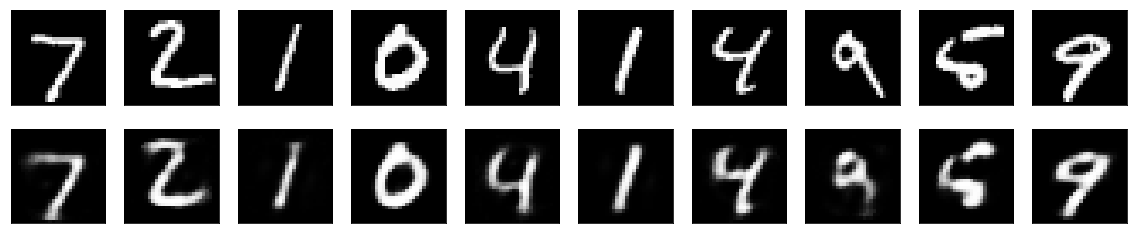

In [13]:
# 何個表示するか
# plt.subplot(行数, 列数, 何番目のプロットか)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)  #軸の値の表示を無効化
    ax.get_yaxis().set_visible(False)  #軸の値の表示を無効化
plt.show()

# オプティマイザをいろいろ変更してみる。

## Momentum、Adagrad、RMSprop、Adam

In [14]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1021 - val_loss: 0.0977
Epoch 2/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.0977 - val_loss: 0.0951
Epoch 3/50
60000/60000 [==============================] - 2s 28us/step - loss: 0.0960 - val_loss: 0.0940
Epoch 4/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0951 - val_loss: 0.0934
Epoch 5/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0946 - val_loss: 0.0930
Epoch 6/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0942 - val_loss: 0.0927
Epoch 7/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0940 - val_loss: 0.0925
Epoch 8/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.0938 - val_loss: 0.0923
Epoch 9/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.0936 - val_loss: 0.0922
Epoch

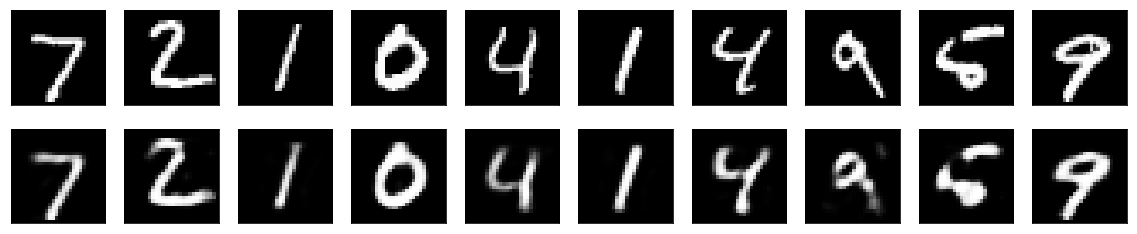

In [15]:
# 何個表示するか
# plt.subplot(行数, 列数, 何番目のプロットか)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)  #軸の値の表示を無効化
    ax.get_yaxis().set_visible(False)  #軸の値の表示を無効化
plt.show()

In [16]:
autoencoder.compile(optimizer='RMSprop', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0933 - val_loss: 0.0919
Epoch 2/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.0932 - val_loss: 0.0921
Epoch 3/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.0932 - val_loss: 0.0926
Epoch 4/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.0932 - val_loss: 0.0920
Epoch 5/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0931 - val_loss: 0.0921
Epoch 6/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0931 - val_loss: 0.0920
Epoch 7/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0931 - val_loss: 0.0921
Epoch 8/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0931 - val_loss: 0.0923
Epoch 9/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0931 - val_loss: 0.0925
Epoch

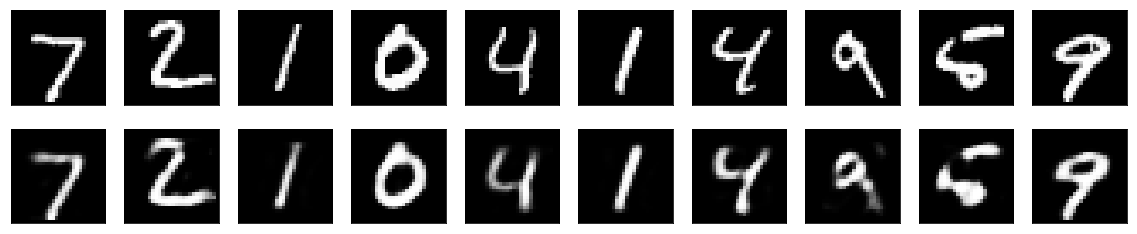

In [17]:
# 何個表示するか
# plt.subplot(行数, 列数, 何番目のプロットか)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)  #軸の値の表示を無効化
    ax.get_yaxis().set_visible(False)  #軸の値の表示を無効化
plt.show()

In [18]:
autoencoder.compile(optimizer='Adagrad', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))
# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.0933 - val_loss: 0.0914
Epoch 2/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.0922 - val_loss: 0.0913
Epoch 3/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0922 - val_loss: 0.0912
Epoch 4/50
60000/60000 [==============================] - 2s 30us/step - loss: 0.0921 - val_loss: 0.0911
Epoch 5/50
60000/60000 [==============================] - 2s 29us/step - loss: 0.0921 - val_loss: 0.0911
Epoch 6/50
60000/60000 [==============================] - 2s 31us/step - loss: 0.0921 - val_loss: 0.0911
Epoch 7/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.0921 - val_loss: 0.0912
Epoch 8/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.0921 - val_loss: 0.0911
Epoch 9/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0921 - val_loss: 0.0911
Epoch

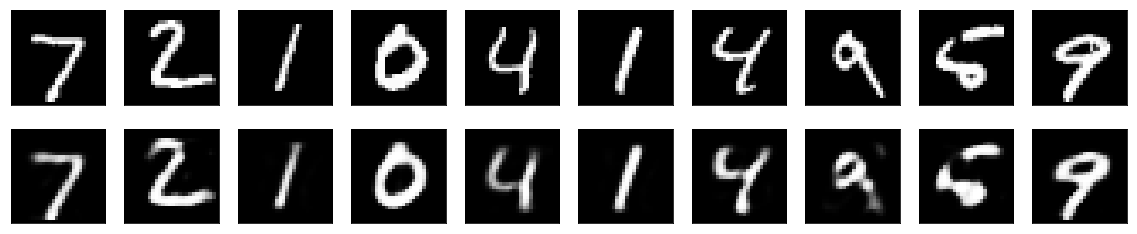

In [19]:
# 何個表示するか
# plt.subplot(行数, 列数, 何番目のプロットか)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)  #軸の値の表示を無効化
    ax.get_yaxis().set_visible(False)  #軸の値の表示を無効化
plt.show()